In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit import rdBase
from __future__ import print_function
print(rdBase.rdkitVersion)

2016.09.2


our test molecule

In [2]:
m = Chem.MolFromSmiles('COC(C=C1)=CC=C1C2=CC=CC=C2OC3=CC=CO3')

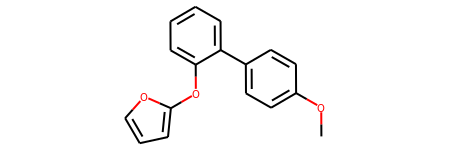

In [3]:
m

our substructure; of note substitution pattern is important

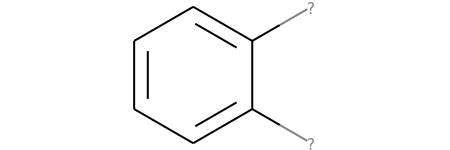

In [4]:
core = Chem.MolFromSmiles('*c1ccccc1*')
corea = Chem.AdjustQueryProperties(core)
corea

get atom mappings; this includes the matched atoms of the wildcard atoms 

In [5]:
maps = m.GetSubstructMatch(corea)

In [6]:
maps

(7, 8, 9, 10, 11, 12, 13, 14)

get the indices of all ring atoms by ring

In [7]:
rings = m.GetRingInfo().AtomRings()

In [8]:
rings

((2, 5, 6, 7, 4, 3), (9, 10, 11, 12, 13, 8), (16, 15, 19, 18, 17))

rather clumpsy way to remove the substituents in maps
a) we sort the atom indices in the rings
b) we check if any of the rings is a subset of the larger pattern map ring index set

In [9]:
sortedRings = ()
for ring in rings:
    mytuple = ()
    ring = tuple(sorted(ring))
    mytuple = (ring,)
    sortedRings = sortedRings + mytuple

In [10]:
for sortedRing in sortedRings:
    if set(sortedRing).issubset(maps):
        updatedMapping = sortedRing

now that we have the correct ring atom indices we assign atom maps

In [11]:
i = 0

for index in updatedMapping:
    at = m.GetAtomWithIdx(index)
   
    if Chem.Atom.IsInRing(at):
        at.SetProp('molAtomMapNumber', str(i))
        i = i + 1

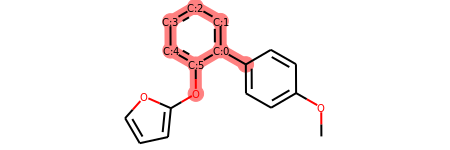

In [12]:
m

use case to show my problem

In [13]:
i = 0

for index in maps:
    at = m.GetAtomWithIdx(index)
   
    if Chem.Atom.IsInRing(at):
        at.SetProp('molAtomMapNumber', str(i))
        i = i + 1

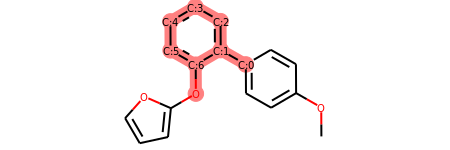

In [14]:
m